# Partie 1 :  Packages

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 

In [ ]:
!pip install langchain chromadb gradio ollama
!pip install -U langchain-community
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.5 MB/s eta 0:00:00


In [ ]:
import re
import gradio as gr
from concurrent.futures import ThreadPoolExecutor
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings import OllamaEmbeddings
from chromadb.config import Settings
from chromadb import Client
from langchain.vectorstores import Chroma

# Partie 2 : Cree la base de donnees

In [ ]:
# import chromadb

# def init_db():
#     """Initialisation de la base de données ChromaDB"""
#     return chromadb.PersistentClient(path="/content/chromadb")

In [ ]:
# db = init_db()

# Partie 3 :  Cree les Collections

In [ ]:
# roles = ["Compta"]
# collections = {role: db.get_or_create_collection(name=f"qa_{role}") for role in roles}

In [ ]:
# collections

In [ ]:
# db.list_collections()

# Partie 3 :  Charger le PDF à l'aide de PyMuPDFLoader

In [ ]:
!ls /content/

 dataset_lf2025_rag_Anwers_DeepSeek.csv
 dataset_lf2025_rag_Anwers_Gemma_2.csv
 dataset_lf2025_rag_Anwers_GPT2.csv
 dataset_lf2025_rag_Anwers_GPT3_5_turbo.csv
 dataset_lf2025_rag_Anwers_GPT4o.csv
 dataset_lf2025_rag_Anwers_GPT4o_mini.csv
 dataset_lf2025_rag_Anwers_GPT4_turbo.csv
 dataset_lf2025_rag_Anwers_llama2.csv
 dataset_lf2025_rag_Anwers_llama3.csv
 dataset_lf2025_rag_Anwers_Mistral_7b.csv
 dataset_lf2025_rag_Anwers_Qwen_3.csv
 dataset_lf2025_rag_Anwers_T5_base.csv
 dataset_lf2025_rag.csv
'LF 2025 - MT ACADEMY.pdf'
'Mesures fiscales de la LF 2025.pdf'
'NC 736 LF 2025.pdf'
 note-fiscale---lf-2025-.pdf
 sample_data


In [ ]:
import os

def list_pdf_files(directory="/content"):
    """
    Liste tous les fichiers PDF dans un répertoire donné
    """
    pdf_files = []

    # Parcourir tous les fichiers dans le répertoire
    for filename in os.listdir(directory):
        if filename.lower().endswith('.pdf'):
            pdf_files.append(filename)

    return sorted(pdf_files)  # Trier par ordre alphabétique

In [ ]:
# Utilisation
pdf_list = list_pdf_files()
print(pdf_list)

['LF 2025 - MT ACADEMY.pdf', 'Mesures fiscales de la LF 2025.pdf', 'NC 736 LF 2025.pdf', 'note-fiscale---lf-2025-.pdf']


In [ ]:
# # Load the documents using PyMuPDFLoader
# loader = PyMuPDFLoader("/content/LF 2025 - MT ACADEMY.pdf")

# documents = loader.load()

In [ ]:
# Load the documents using PyMuPDFLoader
documents_list = []

for pdf in pdf_list:
  loader = PyMuPDFLoader(f"/content/{pdf}")
  documents = loader.load()
  documents_list.append(documents)

In [ ]:
for documents in documents_list:
  assert len(documents) > 0, "Erreur : Aucun document chargé !"
  print("✅ Chargement du PDF réussi :", len(documents), "documents extraits.")

✅ Chargement du PDF réussi : 68 documents extraits.
✅ Chargement du PDF réussi : 41 documents extraits.
✅ Chargement du PDF réussi : 66 documents extraits.
✅ Chargement du PDF réussi : 11 documents extraits.


In [ ]:
print(documents_list[0])

[Document(metadata={'producer': 'www.ilovepdf.com', 'creator': 'Microsoft® PowerPoint® 2016', 'creationdate': '2025-01-21T14:07:45+00:00', 'source': '/content/LF 2025 - MT ACADEMY.pdf', 'file_path': '/content/LF 2025 - MT ACADEMY.pdf', 'total_pages': 68, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-21T14:07:45+00:00', 'trapped': '', 'modDate': 'D:20250121140745Z', 'creationDate': "D:20250121140745+00'00'", 'page': 0}, page_content='PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA LF 2025'), Document(metadata={'producer': 'www.ilovepdf.com', 'creator': 'Microsoft® PowerPoint® 2016', 'creationdate': '2025-01-21T14:07:45+00:00', 'source': '/content/LF 2025 - MT ACADEMY.pdf', 'file_path': '/content/LF 2025 - MT ACADEMY.pdf', 'total_pages': 68, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-21T14:07:45+00:00', 'trapped': '', 'modDate': 'D:20250121140745Z', 'creationDate': "D:20250121140745

# Partie 4 Diviser le document en morceaux plus petits

In [ ]:
# # Split the document into smaller chunks
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

# chunks = text_splitter.split_documents(documents)

In [ ]:
# Split the document into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

chunks_list = []
for documents in documents_list:
  chunks = text_splitter.split_documents(documents)
  chunks_list.append(chunks)

In [ ]:
for chunks in chunks_list:
  assert len(chunks) > 0, "Erreur : Aucun chunk généré !"
  print("✅ Découpage réussi :", len(chunks), "chunks créés.")

✅ Découpage réussi : 84 chunks créés.
✅ Découpage réussi : 46 chunks créés.
✅ Découpage réussi : 244 chunks créés.
✅ Découpage réussi : 43 chunks créés.


In [ ]:
# i = 1
# for chunk in chunks_list[0]:
#     print(f' \nchunk {i}: ')
#     print(chunk)
#     i += 1

In [ ]:
# article_num = 1
# for chunks in chunks_list:
#   print(f'\n-------------> Article_num {article_num}: ')

#   i = 1
#   for chunk in chunks:
#       print(f' \nchunk {i}: ')
#       print(chunk)
#       i += 1

#   article_num += 1

# Partie 5 : Generation Embedding

## générer des Embedding à l'aide de Hugging Face Embeddings all-MiniLM-L6-v2

In [ ]:
#!pip install sentence-transformers

from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/tmp/ipython-input-21-3352353473.py:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## générer des Embedding à l'aide de Hugging Face Embeddings intfloat/e5-base-v2

In [ ]:
#!pip install sentence-transformers

from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(
    model_name="intfloat/e5-base-v2",
    encode_kwargs={'normalize_embeddings': True}
)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## générer des Embedding à l'aide de Hugging Face Embeddings intfloat/multilingual-e5-base

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(
    model_name="intfloat/multilingual-e5-base",
    encode_kwargs={'normalize_embeddings': True}
)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/179k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## générer des Embedding à l'aide de Hugging Face Embeddings thenlper/gte-base

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(
    model_name="thenlper/gte-base",
    encode_kwargs={'normalize_embeddings': True}
)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## (Valide) générer des Embedding à l'aide de Hugging Face Embeddings thenlper/gte-large

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(
    model_name="thenlper/gte-large",
    encode_kwargs={'normalize_embeddings': True}
)

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## générer des Embedding à l'aide de Hugging Face Embeddings sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_function = HuggingFaceEmbeddings(
    model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# # Parallelize embedding generation
# def generate_embedding(chunk):
#     return embedding_function.embed_query(chunk.page_content)


# with ThreadPoolExecutor() as executor:
#     embeddings = list(executor.map(generate_embedding, chunks))

In [ ]:
# Parallelize embedding generation
def generate_embedding(chunk):
    return embedding_function.embed_query(chunk.page_content)

embeddings_list = []
for chunks in chunks_list:
  with ThreadPoolExecutor() as executor:
    embeddings = list(executor.map(generate_embedding, chunks))
  embeddings_list.append(embeddings)

In [ ]:
for embeddings in embeddings_list:
  print(len(embeddings))

84
46
244
43


In [ ]:
# assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
# print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

In [ ]:
for chunks, embeddings in zip(chunks_list, embeddings_list):
    assert len(embeddings) == len(chunks), "Erreur : Le nombre d'embeddings ne correspond pas aux chunks !"
    print("✅ Génération des embeddings réussie :", len(embeddings), "embeddings générés.")

✅ Génération des embeddings réussie : 84 embeddings générés.
✅ Génération des embeddings réussie : 46 embeddings générés.
✅ Génération des embeddings réussie : 244 embeddings générés.
✅ Génération des embeddings réussie : 43 embeddings générés.


## Selection Finale de Embedding

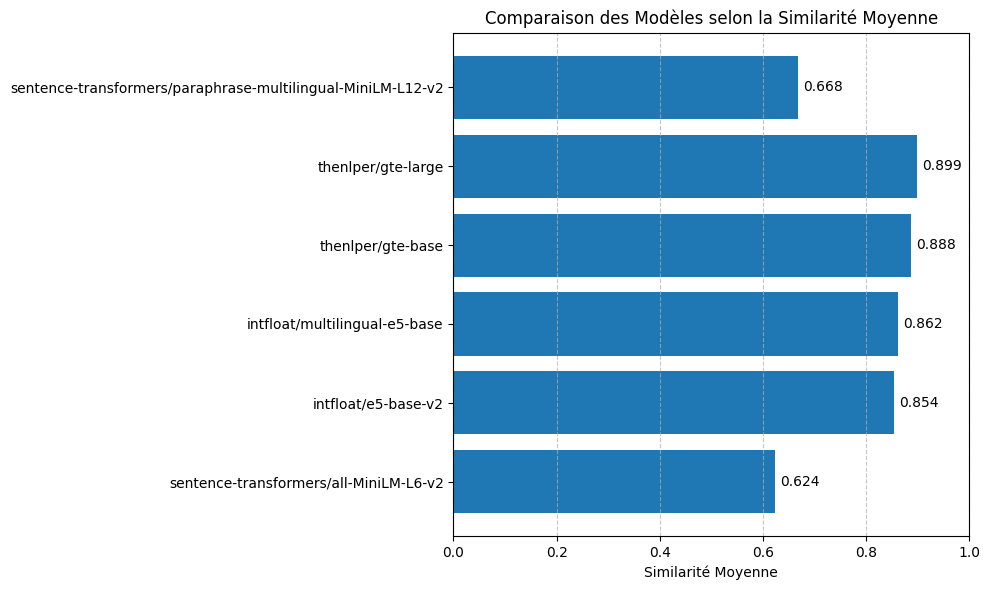

In [1]:
import matplotlib.pyplot as plt

# Noms des modèles
models = [
    "sentence-transformers/all-MiniLM-L6-v2",
    "intfloat/e5-base-v2",
    "intfloat/multilingual-e5-base",
    "thenlper/gte-base",
    "thenlper/gte-large",
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
]

# Valeurs des similarités moyennes
mean_similarities = [
    0.6242951017103737,
    0.8542539552671646,
    0.8623580654598683,
    0.8880277760671424,
    0.899482261760394,
    0.6680511529837401
]

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(models, mean_similarities)

# Ajout des valeurs sur les barres
for bar, value in zip(bars, mean_similarities):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", va='center')

# Titres et labels
plt.xlabel("Similarité Moyenne")
plt.title("Comparaison des Modèles selon la Similarité Moyenne")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Partie 6 : Stocker les intégrations dans Chroma Vector Store

In [ ]:
# Initialize Chroma client and create/reset the collection
client = Client(Settings())
client.delete_collection(name="Compta")  # Delete existing collection (if any)
collection = client.create_collection(name="Compta")

for chunks, embeddings in zip(chunks_list, embeddings_list):
  # Add documents and embeddings to Chroma
  for idx, chunk in enumerate(chunks):
      collection.add(
          documents=[chunk.page_content],
          metadatas=[{'id': idx}],
          embeddings=[embeddings[idx]],
          ids=[str(idx)]  # Ensure IDs are strings
      )

# Partie 7 :  Initialiser le Retriever

In [ ]:
# Initialize retriever using Ollama embeddings for queries
retriever = Chroma(
      collection_name="Compta",
      client=client,
      embedding_function=embedding_function
).as_retriever()

## LF 2025 - MT ACADEMY.pdf

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
retrieved_docs = retriever.invoke(test_question)

assert len(retrieved_docs) > 0, "Erreur : Aucun document récupéré !"
print("✅ Retriever fonctionne correctement :", len(retrieved_docs), "documents récupérés.")

✅ Retriever fonctionne correctement : 4 documents récupérés.


In [ ]:
# i = 1
# for ret in retrieved_docs:
#   print(f'\nrest {i}')
#   print(ret)
#   i += 1

In [ ]:
test_question = "Quelles sont les modifications apportées au barème progressif de l'IR par la LF 2025 ?"
retrieved_docs = retriever.invoke(test_question)

assert len(retrieved_docs) > 0, "Erreur : Aucun document récupéré !"
print("✅ Retriever fonctionne correctement :", len(retrieved_docs), "documents récupérés.")

✅ Retriever fonctionne correctement : 4 documents récupérés.


## Mesures fiscales de la LF 2025.pdf

In [ ]:
test_question = "Quelles sont les principales mesures fiscales introduites par la loi de finance 2025 ?"
retrieved_docs = retriever.invoke(test_question)

assert len(retrieved_docs) > 0, "Erreur : Aucun document récupéré !"
print("✅ Retriever fonctionne correctement :", len(retrieved_docs), "documents récupérés.")

✅ Retriever fonctionne correctement : 4 documents récupérés.


# Partie 8 :  Définir le pipeline RAG

In [ ]:
def retrieve_context(question):
    # Retrieve relevant documents
    results = retriever.invoke(question)

    # Combine the retrieved content
    context = "\n\n".join([doc.page_content for doc in results])
    return context

In [ ]:
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

✅ Contexte récupéré : 329 mots extraits.


In [ ]:
context

"PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA LF 2025\n\nLOI DE FINANCES 2025\nPRINCIPALES DISPOSITIONS FISCALES\nImpôt sur le Revenu\nImpôt sur les Sociétés\nTaxe sur la Valeur Ajoutée\nDroits d’Enregistrement\nAutres Dispositions\n\n62 \nLa LF 2025 précitée a prévu que cet accord est définitif et irrévocable et qu’il porte sur \nles questions de fait relatives aux éléments d’imposition évalués par l’administration et \nne peut en aucun cas porter sur des questions de droit.  \nA cet effet, sont considérées comme des questions de fait, les appréciations et les \névaluations effectuées par l’administration fiscale pour la détermination des \nbases d’imposition, dans le cadre de l’exercice de son pouvoir d’appréciation, sans \nremettre en cause les principes de droit prévus par la législation fiscale en vigueur. \nIl s’agit, notamment, des questions de fait afférentes aux rectifications effectuées par \nl’administration fiscale compte tenu des informations à sa disposition et des \ncir

# Partie 9 : Evalue Retriver

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def evaluate_retrieval_similarity(questions):
    similarities = []

    for question in questions:
        # ✅ results est déjà une chaîne concaténée
        context = retrieve_context(question)

        if not context.strip():
            continue  # Skip si vide

        # Embedding
        q_embed = embedding_function.embed_query("query: " + question)
        doc_embed = embedding_function.embed_documents([context])  # wrapped in list

        # Similarité
        sim_score = cosine_similarity([q_embed], doc_embed)[0][0]
        similarities.append(sim_score)

    return np.mean(similarities)

In [ ]:
questions = [
    "Quels sont les principaux objectifs des mesures fiscales introduites par la LF 2025 ?",
    "Quelles sont les principales dispositions fiscales introduites par la LF 2025 ?",
    "Quels impôts sont concernés par les modifications/réformes de la LF 2025 ?",
    "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?",
    "Quels sont les axes prioritaires de la réforme fiscale de 2025 selon le préambule ?",
    "Comment la LF 2025 vise-t-elle à réduire la pression fiscale sur les ménages ?",
    "Quelles sont les grandes réformes fiscales introduites par la LF 2025 ?",
    "Quelles sont les principales modifications apportées au barème progressif de l’IR en 2025 ?",
    "Quel est le nouveau seuil d’exonération de l’IR et comment a-t-il évolué par rapport à 2024 ?",
    "Quel est le nouveau taux marginal de l’IR ?",
    "Quelles sont les nouvelles tranches du barème annuel et mensuel ?",
    "Quels changements ont été apportés à la réduction pour charges de famille ?",
    "Quel est le nouveau montant de la réduction par personne à charge et son plafond ?",
    "Quelles sont les principales mesures de la LF 2025 pour réduire la charge fiscale des personnes physiques ?",
    "Comment sont désormais imposées les pensions de retraite ?",
    "Quels sont les changements apportés à l'exonération des bons de nourriture pour les salariés ?",
    "Quelles sont les nouvelles règles fiscales pour les pensions de retraite et rentes viagères ?",
    "Quels sont les revenus concernés par la nouvelle catégorie de revenus imposables ?",
    "Comment sont imposés les gains des jeux de hasard selon la LF 2025 ?",
    "Comment sont taxés les gains des jeux de hasard en ligne d’origine étrangère ?",
    "Quel est le taux de retenue à la source sur les gains des jeux en ligne ?",
    "Qui est responsable de la retenue à la source sur ces gains ?",
    "Quelles sont les obligations déclaratives liées à ces gains ?",
    "Quelles sont les conditions d’exonération des indemnités de stage ?",
    "Quelle est la durée d’exonération des indemnités de stage ?",
    "Quels stagiaires sont concernés par l’exonération ?",
    "Quelles sont les obligations de l’employeur pour bénéficier de l’exonération ?",
    "Quelles sont les nouvelles règles d’exonération des indemnités de stage ?",
    "Quelles sont les nouvelles règles concernant les contrats d’assurance-vie et de capitalisation ?",
    "Quelles sont les conséquences fiscales d’un contrat d’assurance-vie de moins de 8 ans ?",
    "Quel est le nouveau régime d’imposition des revenus fonciers ?",
    "Quels revenus fonciers ne sont plus soumis à la retenue à la source ?",
    "Quel est le taux libératoire applicable aux revenus fonciers et ses conditions ?",
    "Quelles simplifications fiscales sont introduites pour les contribuables optant pour le taux libératoire ?",
    "Comment la LF 2025 simplifie-t-elle l’imposition des revenus fonciers ?",
    "Comment la LF 2025 affecte-t-elle la fiscalité des revenus fonciers pour les propriétaires ?",
    "Quelles sont les mesures spécifiques à l’IS introduites par la LF 2025 ?",
    "Quelle est la nouvelle limite de déduction pour les amortissements des véhicules de transport de personnes ?",
    "Quel était le seuil précédent ?",
    "À partir de quand s’applique ce nouveau seuil ?",
    "Comment sont traitées les redevances de crédit-bail pour les véhicules dépassant 400 000 DH ?",
    "Donnez un exemple de calcul d’amortissement déductible pour un véhicule à 500 000 DH.",
    "Quelles sont les nouvelles règles concernant les sociétés en participation ?",
    "Comment la LF 2025 a-t-elle modifié le traitement des GIE (Groupements d’Intérêt Économique) ?",
    "Quels sont les changements apportés au régime de neutralité fiscale pour les groupes de sociétés ?",
    "Quelles sont les principales modifications apportées à la TVA ?",
    "Comment la notion de territorialité a-t-elle été élargie ?",
    "Quelles sont les modifications de la TVA sur les biens d’équipement pour l’enseignement privé ?",
    "Quel est le nouveau taux de TVA appliqué aux levures sèches ?",
    "Quels produits agricoles sont temporairement exonérés de TVA à l’importation ?",
    "Quels produits ou secteurs bénéficient de taux spécifiques ?",
    "Quels sont les changements concernant la TVA sur les locations de locaux professionnels ?",
    "Quel est le nouveau taux de partage de la TVA avec les collectivités territoriales ?",
    "Comment la LF 2025 harmonise-t-elle la TVA sur les services à distance avec les standards internationaux ?",
    "Quelles sont les principales modifications apportées aux droits d’enregistrement ?",
    "Quelles opérations de mutation à titre gratuit sont exonérées ?",
    "Quelles sont les nouvelles obligations pour les notaires en matière de transmission électronique ?",
    "Quelles sont les nouvelles sanctions pour les professionnels chargés de l’enregistrement électronique ?",
    "Quelles sont les mesures fiscales communes introduites ?",
    "Comment la LF 2025 simplifie-t-elle les taxes parafiscales ?",
    "Quel est le nouveau délai de paiement de la TSAV ?",
    "Qu’est-ce que la nouvelle contribution sociale de solidarité sur les jeux de hasard ?",
    "Comment la taxe spéciale sur le ciment a-t-elle été intégrée dans le CGI ?",
    "Quelles sont les nouvelles dispositions concernant la notification électronique en matière fiscale ?",
    "Quels avantages fiscaux sont accordés à la FIFA et ses organismes affiliés ?",
    "À partir de quand s’appliquent les nouvelles mesures sur l’IR ?",
    "Quand entre en vigueur l’exonération totale des pensions de retraite ?",
    "Quand entrent en vigueur les nouvelles règles sur les gains des jeux de hasard en ligne ?",
    "À partir de quand s’appliquent les nouvelles règles d’amortissement des véhicules ?",
    "Comment calculer l’IR pour un salarié marié avec deux enfants selon les nouvelles règles ?",
    "Quel est l’impact de la LF 2025 sur le calcul de l’IR pour les retraités ?",
    "Quelles sont les modalités d’imposition des transferts d’immeubles du patrimoine personnel vers l’actif professionnel ?",
    "Comment évaluer les immobilisations transférées dans le cadre d'une restructuration de groupe ?",
    "Quelles sont les principales différences entre le traitement fiscal avant et après la LF 2025 pour les revenus salariaux ?",
    "Comment a évolué la fiscalité des sociétés en participation entre 2024 et 2025 ?"
]

In [ ]:
mean_similarity = evaluate_retrieval_similarity(questions)

In [ ]:
print('mean similarity = ', mean_similarity)

mean similarity =  0.6680511529837401


# Partie 10 : Selection du model Embedding

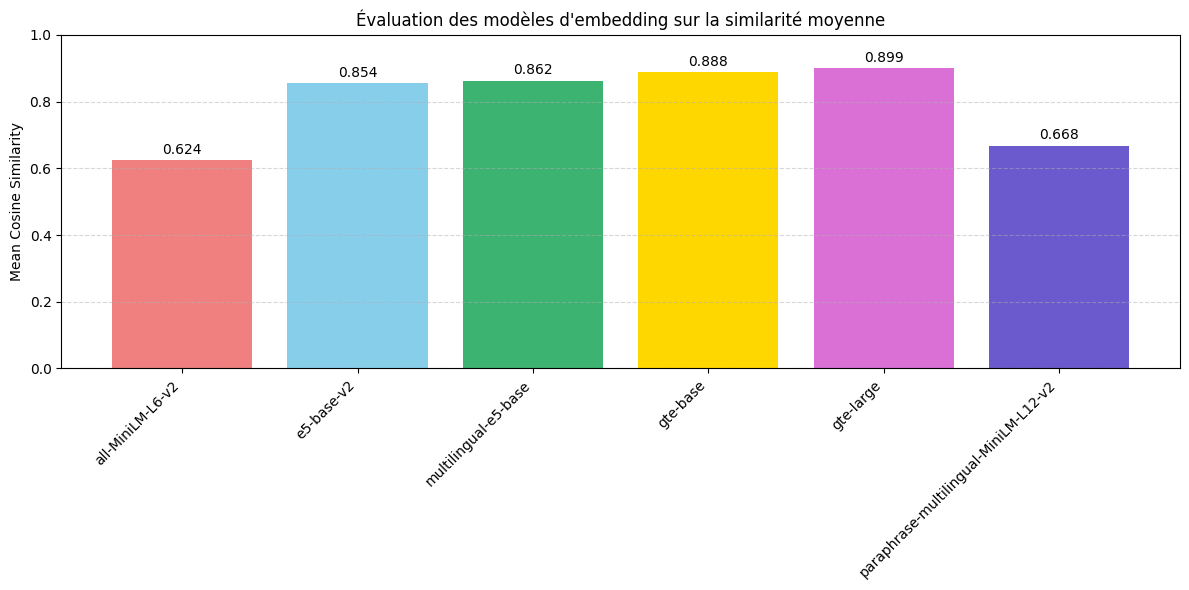

In [ ]:
import matplotlib.pyplot as plt

# Données
models = [
    "all-MiniLM-L6-v2",
    "e5-base-v2",
    "multilingual-e5-base",
    "gte-base",
    "gte-large",
    "paraphrase-multilingual-MiniLM-L12-v2"
]

mean_similarities = [
    0.6243,
    0.8543,
    0.8624,
    0.8880,
    0.8995,
    0.6681
]

colors = ['lightcoral', 'skyblue', 'mediumseagreen', 'gold', 'orchid', 'slateblue']

# Création du graphe
plt.figure(figsize=(12, 6))
bars = plt.bar(models, mean_similarities, color=colors)

# Ajouter les valeurs sur chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.ylim(0, 1)
plt.ylabel("Mean Cosine Similarity")
plt.title("Évaluation des modèles d'embedding sur la similarité moyenne")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

✅ Le meilleur modèle d'embedding pour ton système RAG, selon la similarité moyenne, est thenlper/gte-large, avec un score de 0.899.

👉 Phrase recommandée :

Le modèle thenlper/gte-large obtient la meilleure similarité moyenne (0.899), ce qui en fait le choix optimal pour assurer une correspondance sémantique précise entre les questions et les documents récupérés dans notre système RAG.

# Partie 11 : Query the Model

## Query DeepSeek-V3 for contextual answers

In [ ]:
from google.colab import userdata

deepseek_api_key = userdata.get('DEEPSEEK_API_KEY')

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

SecretNotFoundError: Secret DEEPSEEK_API_KEY does not exist.

In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display


def query_deepseek_V3(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    # Using DeepSeek Chat
    deepseek_via_openai_client = OpenAI(
        api_key=deepseek_api_key,
        base_url="https://api.deepseek.com"
    )

    response = deepseek_via_openai_client.chat.completions.create(
        model="deepseek-chat",
        messages=[{'role': 'user', 'content': formatted_prompt}],
    )

    # Clean and return the response
    response_content = response.choices[0].message.content
    #final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return response_content

In [ ]:
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 353 mots extraits.


In [ ]:
deepseek_respons = query_deepseek(test_question, context)
deepseek_respons

"Voici les principales mesures fiscales introduites par la **loi de finances (LF) 2025** d'après le contexte fourni :\n\n### **1. Impôt sur le Revenu (IR)**  \n- **Réaménagement du barème progressif** :  \n  - Modification des tranches et taux de l’IR à partir du **1er janvier 2025**, dans le cadre de la réforme fiscale (loi-cadre n° 69-19) et conformément à l’accord social d’avril 2024.  \n  - Objectif : Réduire la charge fiscale pour les **fonctionnaires, salariés et retraités** afin d’améliorer leur pouvoir d’achat.  \n  - L’article **73-I du CGI** est modifié pour refléter ce nouveau barème (les détails des tranches ne sont pas précisés dans le contexte).  \n\n### **2. Taxe spéciale sur le ciment**  \n- **Intégration dans le Code Général des Impôts (CGI)** :  \n  - La taxe, initialement créée en 2002 et augmentée en 2004 et 2012, est désormais codifiée dans le CGI pour simplifier et rationaliser son recouvrement.  \n  - **Taux maintenu** à **0,15 dirham/kg** (dernière augmentation 

In [ ]:
print(deepseek_respons)

Voici les principales mesures fiscales introduites par la **loi de finances (LF) 2025** d'après le contexte fourni :

### **1. Impôt sur le Revenu (IR)**  
- **Réaménagement du barème progressif** :  
  - Modification des tranches et taux de l’IR à partir du **1er janvier 2025**, dans le cadre de la réforme fiscale (loi-cadre n° 69-19) et conformément à l’accord social d’avril 2024.  
  - Objectif : Réduire la charge fiscale pour les **fonctionnaires, salariés et retraités** afin d’améliorer leur pouvoir d’achat.  
  - L’article **73-I du CGI** est modifié pour refléter ce nouveau barème (les détails des tranches ne sont pas précisés dans le contexte).  

### **2. Taxe spéciale sur le ciment**  
- **Intégration dans le Code Général des Impôts (CGI)** :  
  - La taxe, initialement créée en 2002 et augmentée en 2004 et 2012, est désormais codifiée dans le CGI pour simplifier et rationaliser son recouvrement.  
  - **Taux maintenu** à **0,15 dirham/kg** (dernière augmentation en 2012).  


In [ ]:
# Affichage en Markdown
display(Markdown(deepseek_respons))

Voici les principales mesures fiscales introduites par la **loi de finances (LF) 2025** d'après le contexte fourni :

### **1. Impôt sur le Revenu (IR)**  
- **Réaménagement du barème progressif** :  
  - Modification des tranches et taux de l’IR à partir du **1er janvier 2025**, dans le cadre de la réforme fiscale (loi-cadre n° 69-19) et conformément à l’accord social d’avril 2024.  
  - Objectif : Réduire la charge fiscale pour les **fonctionnaires, salariés et retraités** afin d’améliorer leur pouvoir d’achat.  
  - L’article **73-I du CGI** est modifié pour refléter ce nouveau barème (les détails des tranches ne sont pas précisés dans le contexte).  

### **2. Taxe spéciale sur le ciment**  
- **Intégration dans le Code Général des Impôts (CGI)** :  
  - La taxe, initialement créée en 2002 et augmentée en 2004 et 2012, est désormais codifiée dans le CGI pour simplifier et rationaliser son recouvrement.  
  - **Taux maintenu** à **0,15 dirham/kg** (dernière augmentation en 2012).  
  - **Gestion attribuée** :  
    - **Direction Générale des Impôts** pour le ciment produit localement.  
    - **Administration des Douanes et Impôts Indirects (ADII)** pour le ciment importé.  

### **Autres dispositions (mentionnées sans détails)**  
- **Impôt sur les Sociétés (IS)** : Pas de précision dans le contexte, mais potentiellement des ajustements liés à la réforme fiscale globale.  
- **TVA et droits d’enregistrement** : Aucune modification spécifique n’est indiquée dans le texte fourni.  

### **Objectifs globaux**  
- **Élargir l’assiette fiscale** tout en **réduisant la pression fiscale** (loi-cadre 69-19).  
- **Simplification administrative** (ex : gestion centralisée de la taxe sur le ciment).  

*Note* : Des mesures supplémentaires pourraient figurer dans la LF 2025, mais elles ne sont pas couvertes par le contexte fourni.

## Query DeepSeek-R1 for contextual answers

In [ ]:
from google.colab import userdata

deepseek_api_key = userdata.get('DEEPSEEK_API_KEY')

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

DeepSeek API Key exists and begins sk-


In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display


def query_deepseek_R1(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    # Using DeepSeek Chat
    deepseek_via_openai_client = OpenAI(
        api_key=deepseek_api_key,
        base_url="https://api.deepseek.com"
    )

    response = deepseek_via_openai_client.chat.completions.create(
        model="deepseek-reasoner",
        messages=[{'role': 'user', 'content': formatted_prompt}],
    )

    # Clean and return the response
    response_content = response.choices[0].message.content
    #final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return response_content

In [ ]:
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
deepseek_respons = query_deepseek_R1(test_question, context)
deepseek_respons

"L'objectif principal de la réforme fiscale de la LF 2025 concernant l'Impôt sur le Revenu (IR) est double, comme l'explique clairement le contexte fourni :\n\n1.  **Réduire la charge fiscale sur les contribuables individuels :** Plus précisément, il s'agit d'**améliorer les revenus des fonctionnaires, des salariés et des retraités** en réduisant leur impôt sur le revenu.\n2.  **Mise en œuvre d'un engagement social :** Cette réduction de l'IR est l'exécution directe d'un engagement pris par le gouvernement dans le cadre de l'accord d'avril 2024 issu du dialogue social.\n\n**Le mécanisme clé pour atteindre cet objectif est le réaménagement du barème progressif de l'impôt sur le revenu,** applicable à partir du 1er janvier 2025.\n\n**En résumé :** L'objectif principal est **d'alléger la charge de l'impôt sur le revenu pour les salariés, fonctionnaires et retraités**, via une modification des tranches d'imposition, afin d'augmenter leur pouvoir d'achat et d'honorer un engagement social.\n

In [ ]:
print(deepseek_respons)

L'objectif principal de la réforme fiscale de la LF 2025 concernant l'Impôt sur le Revenu (IR) est double, comme l'explique clairement le contexte fourni :

1.  **Réduire la charge fiscale sur les contribuables individuels :** Plus précisément, il s'agit d'**améliorer les revenus des fonctionnaires, des salariés et des retraités** en réduisant leur impôt sur le revenu.
2.  **Mise en œuvre d'un engagement social :** Cette réduction de l'IR est l'exécution directe d'un engagement pris par le gouvernement dans le cadre de l'accord d'avril 2024 issu du dialogue social.

**Le mécanisme clé pour atteindre cet objectif est le réaménagement du barème progressif de l'impôt sur le revenu,** applicable à partir du 1er janvier 2025.

**En résumé :** L'objectif principal est **d'alléger la charge de l'impôt sur le revenu pour les salariés, fonctionnaires et retraités**, via une modification des tranches d'imposition, afin d'augmenter leur pouvoir d'achat et d'honorer un engagement social.

*   Le c

In [ ]:
# Affichage en Markdown
display(Markdown(deepseek_respons))

Voici les principales mesures fiscales introduites par la **loi de finances (LF) 2025** d'après le contexte fourni :

### **1. Impôt sur le Revenu (IR)**  
- **Réaménagement du barème progressif** :  
  - Modification des tranches et taux de l’IR à partir du **1er janvier 2025**, dans le cadre de la réforme fiscale (loi-cadre n° 69-19) et conformément à l’accord social d’avril 2024.  
  - Objectif : Réduire la charge fiscale pour les **fonctionnaires, salariés et retraités** afin d’améliorer leur pouvoir d’achat.  
  - L’article **73-I du CGI** est modifié pour refléter ce nouveau barème (les détails des tranches ne sont pas précisés dans le contexte).  

### **2. Taxe spéciale sur le ciment**  
- **Intégration dans le Code Général des Impôts (CGI)** :  
  - La taxe, initialement créée en 2002 et augmentée en 2004 et 2012, est désormais codifiée dans le CGI pour simplifier et rationaliser son recouvrement.  
  - **Taux maintenu** à **0,15 dirham/kg** (dernière augmentation en 2012).  
  - **Gestion attribuée** :  
    - **Direction Générale des Impôts** pour le ciment produit localement.  
    - **Administration des Douanes et Impôts Indirects (ADII)** pour le ciment importé.  

### **Autres dispositions (mentionnées sans détails)**  
- **Impôt sur les Sociétés (IS)** : Pas de précision dans le contexte, mais potentiellement des ajustements liés à la réforme fiscale globale.  
- **TVA et droits d’enregistrement** : Aucune modification spécifique n’est indiquée dans le texte fourni.  

### **Objectifs globaux**  
- **Élargir l’assiette fiscale** tout en **réduisant la pression fiscale** (loi-cadre 69-19).  
- **Simplification administrative** (ex : gestion centralisée de la taxe sur le ciment).  

*Note* : Des mesures supplémentaires pourraient figurer dans la LF 2025, mais elles ne sont pas couvertes par le contexte fourni.

## Query GPT4-mini for contextual answers

In [ ]:
from google.colab import userdata

openai_api_key = userdata.get('openai_api_key')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:3]}")
else:
    print("OpenAI API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

OpenAI API Key exists and begins sk-


In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display

openai = OpenAI()

def query_gpt4o_mini(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    completion = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{'role': 'user', 'content': formatted_prompt}],
        temperature=0.7,
    )
    return completion.choices[0].message.content.strip()

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
gpt4o_mini_respons = query_gpt4o_mini(test_question, context)
gpt4o_mini_respons

"L'objectif principal de la réforme fiscale introduite par la Loi de Finances (LF) 2025 est de réduire la pression fiscale sur les contribuables, notamment les fonctionnaires, les salariés et les retraités. Cela se fait à travers un réaménagement du barème progressif de l'impôt sur le revenu, visant à améliorer leurs revenus en diminuant leur charge fiscale. Cette réforme s'inscrit dans le cadre d'un engagement gouvernemental pour favoriser le dialogue social et élargir l'assiette fiscale au fur et à mesure. En somme, l'objectif est de rendre le système fiscal plus équitable tout en allégeant la fiscalité des ménages."

In [ ]:
print(gpt4o_mini_respons)

L'objectif principal de la réforme fiscale introduite par la Loi de Finances (LF) 2025 est de réduire la pression fiscale sur les contribuables, notamment les fonctionnaires, les salariés et les retraités. Cela se fait à travers un réaménagement du barème progressif de l'impôt sur le revenu, visant à améliorer leurs revenus en diminuant leur charge fiscale. Cette réforme s'inscrit dans le cadre d'un engagement gouvernemental pour favoriser le dialogue social et élargir l'assiette fiscale au fur et à mesure. En somme, l'objectif est de rendre le système fiscal plus équitable tout en allégeant la fiscalité des ménages.


## Query Gpt-4-turbo for contextual answers

In [ ]:
from google.colab import userdata

openai_api_key = userdata.get('openai_api_key')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:3]}")
else:
    print("OpenAI API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

OpenAI API Key exists and begins sk-


In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display

openai = OpenAI()

def query_gpt4_turbo(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    completion = openai.chat.completions.create(
        model="gpt-4-turbo",
        messages=[{'role': 'user', 'content': formatted_prompt}],
        temperature=0.7,
    )
    return completion.choices[0].message.content.strip()

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
query_gpt4_turbo_respons = query_gpt4_turbo(test_question, context)
query_gpt4_turbo_respons

"L'objectif principal de la réforme fiscale introduite par la Loi de Finances (LF) 2025 est la baisse de la pression fiscale sur les contribuables, notamment à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu. Cette réforme vise spécifiquement à améliorer les revenus des fonctionnaires, des salariés et des retraités en réaménageant le barème progressif des taux de l'impôt sur le revenu à partir du 1er janvier 2025. Cette initiative est en réponse à l'engagement du Gouvernement prévu par l'accord d'avril 2024 relatif au dialogue social et s'inscrit dans la continuité de la mise en œuvre de la loi-cadre n° 69-19, qui porte sur la réforme fiscale et prévoit l'élargissement de l'assiette fiscale."

In [ ]:
print(query_gpt4_turbo_respons)

L'objectif principal de la réforme fiscale introduite par la Loi de Finances (LF) 2025 est la baisse de la pression fiscale sur les contribuables, notamment à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu. Cette réforme vise spécifiquement à améliorer les revenus des fonctionnaires, des salariés et des retraités en réaménageant le barème progressif des taux de l'impôt sur le revenu à partir du 1er janvier 2025. Cette initiative est en réponse à l'engagement du Gouvernement prévu par l'accord d'avril 2024 relatif au dialogue social et s'inscrit dans la continuité de la mise en œuvre de la loi-cadre n° 69-19, qui porte sur la réforme fiscale et prévoit l'élargissement de l'assiette fiscale.


## Query gpt-3.5-turbo for contextual answers

In [ ]:
from google.colab import userdata

openai_api_key = userdata.get('openai_api_key')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:3]}")
else:
    print("OpenAI API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

OpenAI API Key exists and begins sk-


In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display

openai = OpenAI(api_key = openai_api_key)

def query_gpt3_5_turbo(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    completion = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{'role': 'user', 'content': formatted_prompt}],
        temperature=0.7,
    )
    return completion.choices[0].message.content.strip()

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
query_gpt3_5_turbo_respons = query_gpt3_5_turbo(test_question, context)
query_gpt3_5_turbo_respons

"L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables en élargissant l'assiette fiscale. Cette réforme vise également à améliorer les revenus des fonctionnaires, des salariés et des retraités en réduisant leur charge fiscale en matière d'impôt sur le revenu grâce au réaménagement du barème progressif des taux de cet impôt. En résumé, l'objectif est d'offrir un allègement fiscal aux contribuables tout en augmentant leurs revenus."

In [ ]:
print(query_gpt3_5_turbo_respons)

L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables en élargissant l'assiette fiscale. Cette réforme vise également à améliorer les revenus des fonctionnaires, des salariés et des retraités en réduisant leur charge fiscale en matière d'impôt sur le revenu grâce au réaménagement du barème progressif des taux de cet impôt. En résumé, l'objectif est d'offrir un allègement fiscal aux contribuables tout en augmentant leurs revenus.


## Query gpt-4o for contextual answers

In [ ]:
from google.colab import userdata

openai_api_key = userdata.get('openai_api_key')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:3]}")
else:
    print("OpenAI API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

OpenAI API Key exists and begins sk-


In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display, update_display

openai = OpenAI(api_key = openai_api_key)

def query_gpt4o(question, context):
    # Format the input prompt
    formatted_prompt = f"Question: {question}\n\nContext: {context}"

    completion = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{'role': 'user', 'content': formatted_prompt}],
        temperature=0.7,
    )
    return completion.choices[0].message.content.strip()

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
respons = query_gpt4o(test_question, context)
respons

"L'objectif principal de la réforme fiscale introduite par la Loi de Finances 2025 est de réduire la pression fiscale sur les contribuables en réaménageant le barème progressif de l'impôt sur le revenu. Cette réforme vise à élargir l'assiette fiscale tout en améliorant les revenus des fonctionnaires, des salariés et des retraités, conformément à l'engagement du gouvernement pris dans le cadre du dialogue social d'avril 2024. En somme, elle cherche à alléger la charge fiscale des individus afin de stimuler leur pouvoir d'achat."

In [ ]:
print(respons)

L'objectif principal de la réforme fiscale introduite par la Loi de Finances 2025 est de réduire la pression fiscale sur les contribuables en réaménageant le barème progressif de l'impôt sur le revenu. Cette réforme vise à élargir l'assiette fiscale tout en améliorant les revenus des fonctionnaires, des salariés et des retraités, conformément à l'engagement du gouvernement pris dans le cadre du dialogue social d'avril 2024. En somme, elle cherche à alléger la charge fiscale des individus afin de stimuler leur pouvoir d'achat.


## Query gpt-2 for contextual answers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="openai-community/gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def query_gpt2(question: str, context: str, max_new_tokens: int = 80):
    """
    Génère une réponse de GPT‑2 à `question` en lui fournissant un `context`.

    Args:
        question (str): la question à poser.
        context  (str): du contexte supplémentaire (historique, extrait, etc.).
        max_new_tokens (int): nombre maximum de tokens générés.

    Returns:
        str: le texte généré.
    """
    system = (
        "Tu es expert en fiscalité marocaine. "
        "Réponds brièvement et uniquement à partir du contexte fourni. "
        "Si l'information n'est pas dans le contexte, dis « Je ne sais pas »."
    )

    # Prompt au format Alpaca/Zephyr :
    prompt = (
        "Tu es expert en fiscalité marocaine.\n"
        "À partir du contexte fourni, réponds brièvement à la question.\n\n"
        f"Contexte:\n{context}\n\n"
        f"Question: {question}\n"
        "Réponse concise:"
    )

    out = pipe(
        prompt,
        max_new_tokens=max_new_tokens,
        temperature=0.3,
        top_p=0.8,
        pad_token_id=pipe.tokenizer.eos_token_id,
        eos_token_id=pipe.tokenizer.eos_token_id,
        #stop=["</s>", "[/INST]"]
    )

    # On récupère uniquement le texte généré après le prompt
    return out[0]["generated_text"][len(prompt):].strip()

In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

#print(context)

✅ Contexte récupéré : 269 mots extraits.


In [ ]:
respons = query_gpt2(test_question, context)
respons

'•\n\nF1 est éligible au régime de la neutralité fiscale car M détient 80% de F1;\n\n•\n\nF2 est éligible au régime de la neutralité fiscale, car M ne détient que 70% de son capital \n(> à ; 66,67%);'

In [ ]:
print(respons)

•

F1 est éligible au régime de la neutralité fiscale car M détient 80% de F1;

•

F2 est éligible au régime de la neutralité fiscale, car M ne détient que 70% de son capital 
(> à ; 66,67%);


## Query llama-2 for contextual answers

In [ ]:
# !pip install together

In [ ]:
from together import Together

api_key = "###"
client = Together(api_key = api_key)

In [ ]:
def query_llama2(question, context):
    prompt = (
        f"Answer the question using the context below.\n"
        f"Only answer the question, do not continue with other examples.\n\n"
        f"Context:\n{context}\n\n"
        f"Question: {question}\n"
        f"Answer:"
    )
    #print("📝 Prompt envoyé :\n", prompt)

    response = client.completions.create(
        model="meta-llama/Llama-2-70b-hf",
        prompt=prompt,
        max_tokens=400,        # Réduction si besoin
        temperature=0.3,        # Moins de créativité, plus de précision
        stop=["\n", "Question:", "Context:"]
    )

    return response.choices[0].text.strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = query_llama2(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 269 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = query_llama2(test_question, context)
respons

'Réduction de la pression fiscale sur les contribuables'

In [ ]:
print(respons)

Réduction de la pression fiscale sur les contribuables


## Query llama-3 for contextual answers

In [ ]:
# !pip install together

In [ ]:
from together import Together

api_key = "###"
client = Together(api_key = api_key)

In [ ]:
def query_llama3(question, context):
    prompt = (
        f"Answer the question using the context below.\n"
        f"Only answer the question, do not continue with other examples.\n\n"
        f"Context:\n{context}\n\n"
        f"Question: {question}\n"
        f"Answer:"
    )
    #print("📝 Prompt envoyé :\n", prompt)

    response = client.completions.create(
        model="meta-llama/Llama-3-8b-chat-hf",
        prompt=prompt,
        max_tokens=400,        # Réduction si besoin
        temperature=0.3,        # Moins de créativité, plus de précision
        stop=["\n", "Question:", "Context:"]
    )

    return response.choices[0].text.strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = query_llama3(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat.


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 472 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = query_llama3(test_question, context)
respons

"L'objectif principal de la réforme fiscale introduite par la LF 2025 est la baisse de la pression fiscale sur les contribuables au fur et à mesure de l'élargissement de l'assiette. Elle vise également à améliorer les revenus des fonctionnaires, des salariés et des retraités, à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu."

In [ ]:
print(respons)

L'objectif principal de la réforme fiscale introduite par la LF 2025 est la baisse de la pression fiscale sur les contribuables au fur et à mesure de l'élargissement de l'assiette. Elle vise également à améliorer les revenus des fonctionnaires, des salariés et des retraités, à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu.


## Query Mistral-7 for contextual answers

In [ ]:
# !pip install together

In [ ]:
from together import Together

api_key = "###"
client = Together(api_key = api_key)

In [ ]:
def Query_Mistral_7b(question, context):
    prompt = (
        f"Answer the question using the context below.\n"
        f"Only answer the question, do not continue with other examples.\n\n"
        f"Context:\n{context}\n\n"
        f"Question: {question}\n"
        f"Answer:"
    )

    response = client.completions.create(
        model="mistralai/Mistral-7B-Instruct-v0.2",
        prompt=prompt,
        max_tokens=400,
        temperature=0.3,
        stop=["\n", "Question:", "Context:"]
    )

    return response.choices[0].text.strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = Query_Mistral_7b(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat is the capital of Morocco.


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 269 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = Query_Mistral_7b(test_question, context)
respons

"L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables au fur et à mesure de l'élargissement de l'assiette, et d'améliorer les revenus des fonctionnaires, des salariés et des retraités, en réduisant leur charge fiscale en matière d'impôt sur le revenu."

In [ ]:
print(respons)

L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables au fur et à mesure de l'élargissement de l'assiette, et d'améliorer les revenus des fonctionnaires, des salariés et des retraités, en réduisant leur charge fiscale en matière d'impôt sur le revenu.


## Query Qwen-3 for contextual answers

In [ ]:
!pip install together

  Using cached together-1.5.17-py3-none-any.whl.metadata (15 kB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached typer-0.15.4-py3-none-any.whl.metadata (15 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached together-1.5.17-py3-none-any.whl (91 kB)
Using cached eval_type_backport-0.2.2-py3-none-any.whl (5.8 kB)
Using cached typer-0.15.4-py3-none-any.whl (45 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
  Attempting uninstall: typer
    Found existing installation: typer 0.16.0
    Uninstalling typer-0.16.0:
      Successfully uninstalled typer-0.16.0


In [ ]:
from together import Together

api_key = "###"
client = Together(api_key = api_key)

In [ ]:
def Query_Qwen3(question, context):
    prompt = (
        f"Answer the question using the context below.\n"
        f"Only answer the question, do not continue with other examples.\n\n"
        f"Context:\n{context}\n\n"
        f"Question: {question}\n"
        f"Answer:"
    )

    response = client.completions.create(
        model="Qwen/Qwen3-235B-A22B-fp8-tput",
        prompt=prompt,
        max_tokens=400,
        temperature=0.3,
        stop=["\n", "Question:", "Context:"]
    )

    return response.choices[0].text.strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = Query_Qwen3(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 472 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = Query_Qwen3(test_question, context)
respons

"L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables tout en élargissant l'assiette fiscale, notamment par la réforme de l'impôt sur le revenu (IR) et la modification du barème progressif des taux d'imposition à partir du 1er janvier 2025."

In [ ]:
print(respons)

L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables tout en élargissant l'assiette fiscale, notamment par la réforme de l'impôt sur le revenu (IR) et la modification du barème progressif des taux d'imposition à partir du 1er janvier 2025.


## Query Gemma-2 for contextual answers

In [ ]:
# !pip install together

In [ ]:
from together import Together

api_key = "###"
client = Together(api_key = api_key)

In [ ]:
def Query_Gemma2(question, context):
    prompt = (
        f"Answer the question using the context below.\n"
        f"Only answer the question, do not continue with other examples.\n\n"
        f"Context:\n{context}\n\n"
        f"Question: {question}\n"
        f"Answer:"
    )

    response = client.completions.create(
        model="google/gemma-2-27b-it",
        prompt=prompt,
        max_tokens=400,
        temperature=0.3,
        stop=["\n", "Question:", "Context:"]
    )

    return response.choices[0].text.strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = Query_Gemma2(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 269 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = Query_Gemma2(test_question, context)
respons

"L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables."

In [ ]:
print(respons)

L'objectif principal de la réforme fiscale introduite par la LF 2025 est de réduire la pression fiscale sur les contribuables.


## Query T5-base for contextual answers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/flan-t5-base")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def Query_T5_base(question: str, context: str, max_new_tokens: int = 80):
    prompt = f"Answer the question based on the context.\nContext: {context}\nQuestion: {question}"

    out = pipe(
        prompt,
        max_new_tokens=max_new_tokens,
        pad_token_id=pipe.tokenizer.eos_token_id,
        eos_token_id=pipe.tokenizer.eos_token_id,
    )

    return out[0]["generated_text"].strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = Query_T5_base(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Rabat


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 269 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = Query_T5_base(test_question, context)
respons

Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors


"améliorer les revenus des fonctionnaires, salariés et retraités, à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu"

In [ ]:
print(respons)

améliorer les revenus des fonctionnaires, salariés et retraités, à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu


## Query T5-large for contextual answers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/flan-t5-large")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def Query_T5_large(question: str, context: str, max_new_tokens: int = 80):
    prompt = f"Answer the question based on the context.\nContext: {context}\nQuestion: {question}"

    out = pipe(
        prompt,
        max_new_tokens=max_new_tokens,
        pad_token_id=pipe.tokenizer.eos_token_id,
        eos_token_id=pipe.tokenizer.eos_token_id,
    )

    return out[0]["generated_text"].strip()

In [ ]:
question = "What is the capital of Morocco?"
context = "Morocco is a country in North Africa. It has several major cities including Casablanca and Rabat. The capital city is known for its historical landmarks."

answer = Query_T5_large(question, context)
print("✅ Réponse générée :", answer)

✅ Réponse générée : Casablanca


In [ ]:
test_question = "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"
context = retrieve_context(test_question)

assert len(context) > 0, "Erreur : Contexte vide !"
print("✅ Contexte récupéré :", len(context.split()), "mots extraits.")

print(context)

✅ Contexte récupéré : 269 mots extraits.
PRINCIPALES 
DISPOSITIONS 
FISCALES 
DE LA LF 2025

La réforme de l’IR s’inscrit dans le cadre de la continuité de
la mise en œuvre de la loi-cadre n° 69-19 portant réforme
fiscale visant, notamment, la baisse de la pression fiscale
sur les contribuables au fur et à mesure de l’élargissement
de l’assiette.
Cette réforme s’inscrit également dans le cadre de
l’exécution de l’engagement du Gouvernement prévu par
l’accord
d’avril
2024
relatif
au
dialogue
social,
afin
d’améliorer les revenus des fonctionnaires, des salariés et
des retraités, à travers la réduction de leur charge fiscale en
matière d’impôt sur le revenu, suite au réaménagement du
barème progressif des taux de cet impôt à partir du 1er
janvier 2025.
Pour ce faire, la LF 2025 a introduit le nouveau barème qui
se présente comme suit :
Réaménagement du barème progressif de l’impôt sur le revenu (73-I du CGI)
Date d’effet : les dispositions de l’article 73-I du CGI telles que modifiées et 

In [ ]:
respons = Query_T5_large(test_question, context)
respons

Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors


'to improve les revenus des fonctionnaires, des salariés et des retraités, à travers la réduction de leur charge fiscale en matière d’impôt sur le revenu'

In [ ]:
print(respons)

améliorer les revenus des fonctionnaires, salariés et retraités, à travers la réduction de leur charge fiscale en matière d'impôt sur le revenu


## Selection du Model de generation

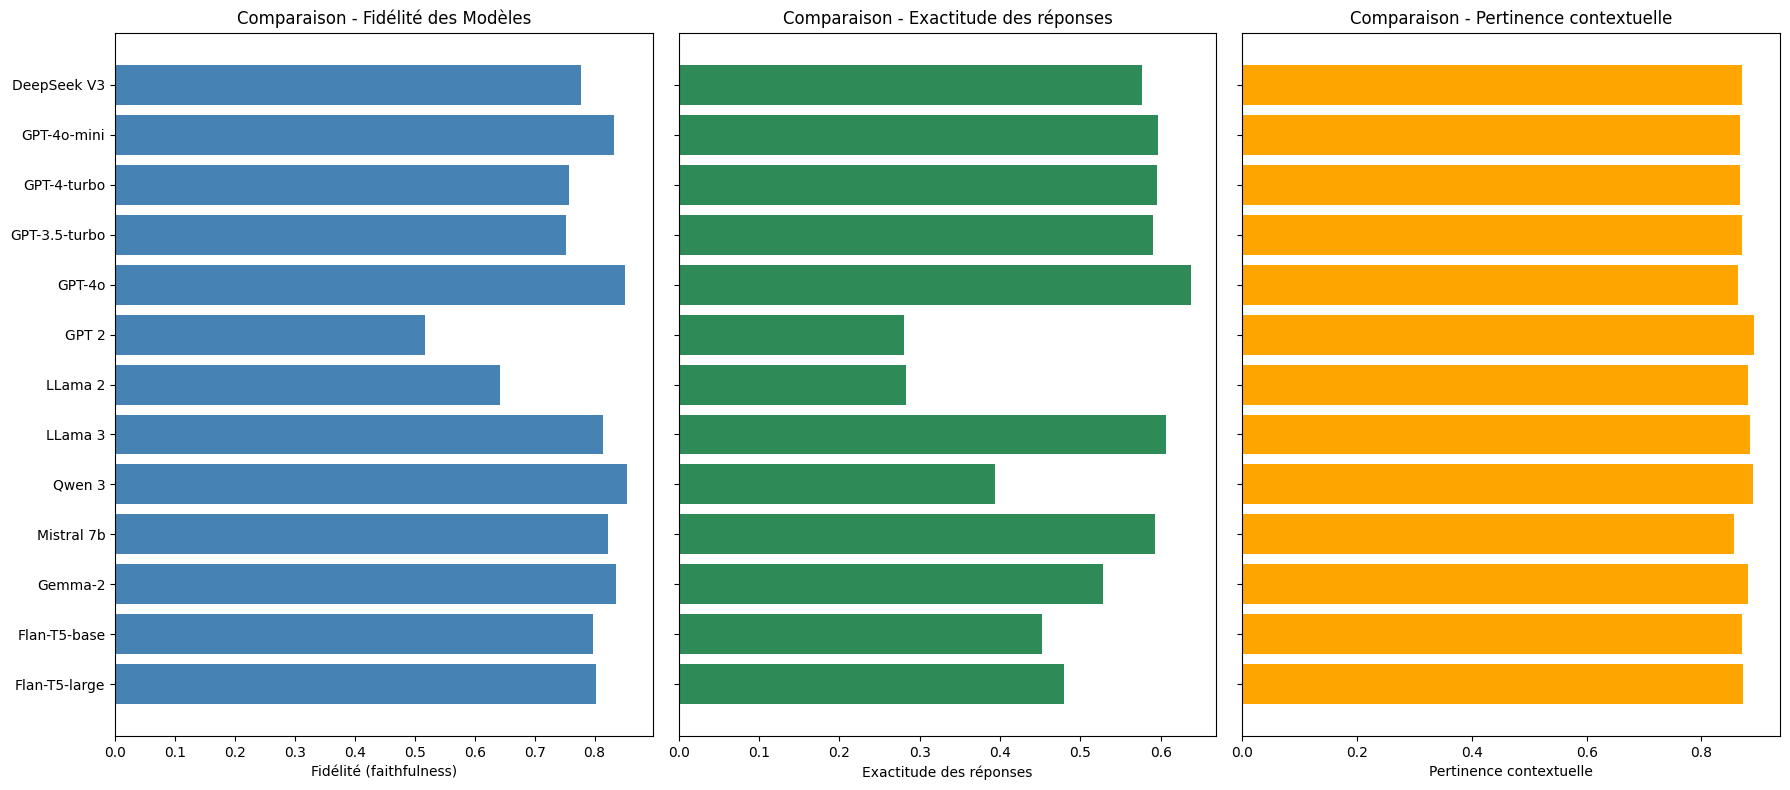

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
models = [
    "DeepSeek V3", "GPT-4o-mini", "GPT-4-turbo", "GPT-3.5-turbo", "GPT-4o",
    "GPT 2", "LLama 2", "LLama 3", "Qwen 3", "Mistral 7b",
    "Gemma-2", "Flan-T5-base", "Flan-T5-large"
]

# Données
faithfulness = [0.7766, 0.8326, 0.7576, 0.7515, 0.8500, 0.5178, 0.6429, 0.8133, 0.8543, 0.8219, 0.8362, 0.7979, 0.8018]
answer_correctness = [0.5770, 0.5966, 0.5950, 0.5906, 0.6375, 0.2801, 0.2824, 0.6066, 0.3935, 0.5928, 0.5281, 0.4528, 0.4795]
nv_context_relevance = [0.8700, 0.8667, 0.8667, 0.8700, 0.8633, 0.8923, 0.8806, 0.8841, 0.8897, 0.8571, 0.8814, 0.8711, 0.8730]

# Taille du graphique
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Positions des barres
y_pos = np.arange(len(models))

# Graphe 1 - Faithfulness
axes[0].barh(y_pos, faithfulness, color='steelblue')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(models)
axes[0].invert_yaxis()
axes[0].set_xlabel("Fidélité (faithfulness)")
axes[0].set_title("Comparaison - Fidélité des Modèles")

# Graphe 2 - Answer Correctness
axes[1].barh(y_pos, answer_correctness, color='seagreen')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels([])
axes[1].invert_yaxis()
axes[1].set_xlabel("Exactitude des réponses")
axes[1].set_title("Comparaison - Exactitude des réponses")

# Graphe 3 - Pertinence Contextuelle
axes[2].barh(y_pos, nv_context_relevance, color='orange')
axes[2].set_yticks(y_pos)
axes[2].set_yticklabels([])
axes[2].invert_yaxis()
axes[2].set_xlabel("Pertinence contextuelle")
axes[2].set_title("Comparaison - Pertinence contextuelle")

plt.tight_layout()
plt.show()

# Partie 12 : Function Ask question

In [ ]:
def ask_question_deepseek_V3(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_deepseek_V3(question, context)
    return answer

In [ ]:
def ask_question_deepseek_R1(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_deepseek_R1(question, context)
    return answer

In [ ]:
def ask_question_GPT4_mini(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_gpt4o_mini(question, context)
    return answer

In [ ]:
def ask_question_Gpt_4_turbo(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_gpt4_turbo(question, context)
    return answer

In [ ]:
def ask_question_Gpt3_5_turbo(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_gpt3_5_turbo(question, context)
    return answer

In [ ]:
def ask_question_Gpt4o(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_gpt4o(question, context)
    return answer

In [ ]:
# import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

def truncate_context(tokenizer, context, max_context_tokens=700):
    tokens = tokenizer.encode(context)
    if len(tokens) > max_context_tokens:
        tokens = tokens[:max_context_tokens]
    return tokenizer.decode(tokens)

def ask_question_Gpt2(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    context = truncate_context(pipe.tokenizer, context)
    answer = query_gpt2(question, context)
    return answer

In [ ]:
def ask_question_llama2(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_llama2(question, context)
    return answer

In [ ]:
def ask_question_llama3(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = query_llama3(question, context)
    return answer

In [ ]:
def ask_question_Mistral_7b(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = Query_Mistral_7b(question, context)
    return answer

In [ ]:
def ask_question_Qwen3(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = Query_Qwen3(question, context)
    return answer

In [ ]:
def ask_question_Gemma2(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = Query_Gemma2(question, context)
    return answer

In [ ]:
def ask_question_T5_base(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = Query_T5_base(question, context)
    return answer

In [ ]:
def ask_question_T5_large(question):
    # Retrieve context and generate an answer using RAG
    context = retrieve_context(question)
    answer = Query_T5_large(question, context)
    return answer

In [ ]:
test_question

"Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?"

In [ ]:
resp = ask_question_T5_large(test_question)

In [ ]:
# # Affichage en Markdown
print(resp)
# display(Markdown(resp))

to improve les revenus des fonctionnaires, des salariés et des retraités, à travers la réduction de leur charge fiscale en matière d’impôt sur le revenu


# Partie 13 : Creation de la dataset de validation

## Creation de la dataset de validation with GPT (question, contexte, ground_truth)

In [ ]:
# questions = [
#     "Quels sont les principaux objectifs des mesures fiscales introduites par la LF 2025 ?",
#     "Quelles sont les principales dispositions fiscales introduites par la LF 2025 ?",
#     "Quels impôts sont concernés par les modifications/réformes de la LF 2025 ?",
#     "Quel est l'objectif principal de la réforme fiscale introduite par la LF 2025 ?",
#     "Quels sont les axes prioritaires de la réforme fiscale de 2025 selon le préambule ?",
#     "Comment la LF 2025 vise-t-elle à réduire la pression fiscale sur les ménages ?",
#     "Quelles sont les grandes réformes fiscales introduites par la LF 2025 ?",
#     "Quelles sont les principales modifications apportées au barème progressif de l’IR en 2025 ?",
#     "Quel est le nouveau seuil d’exonération de l’IR et comment a-t-il évolué par rapport à 2024 ?",
#     "Quel est le nouveau taux marginal de l’IR ?",
#     "Quelles sont les nouvelles tranches du barème annuel et mensuel ?",
#     "Quels changements ont été apportés à la réduction pour charges de famille ?",
#     "Quel est le nouveau montant de la réduction par personne à charge et son plafond ?",
#     "Quelles sont les principales mesures de la LF 2025 pour réduire la charge fiscale des personnes physiques ?",
#     "Comment sont désormais imposées les pensions de retraite ?",
#     "Quels sont les changements apportés à l'exonération des bons de nourriture pour les salariés ?",
#     "Quelles sont les nouvelles règles fiscales pour les pensions de retraite et rentes viagères ?",
#     "Quels sont les revenus concernés par la nouvelle catégorie de revenus imposables ?",
#     "Comment sont imposés les gains des jeux de hasard selon la LF 2025 ?",
#     "Comment sont taxés les gains des jeux de hasard en ligne d’origine étrangère ?",
#     "Quel est le taux de retenue à la source sur les gains des jeux en ligne ?",
#     "Qui est responsable de la retenue à la source sur ces gains ?",
#     "Quelles sont les obligations déclaratives liées à ces gains ?",
#     "Quelles sont les conditions d’exonération des indemnités de stage ?",
#     "Quelle est la durée d’exonération des indemnités de stage ?",
#     "Quels stagiaires sont concernés par l’exonération ?",
#     "Quelles sont les obligations de l’employeur pour bénéficier de l’exonération ?",
#     "Quelles sont les nouvelles règles d’exonération des indemnités de stage ?",
#     "Quelles sont les nouvelles règles concernant les contrats d’assurance-vie et de capitalisation ?",
#     "Quelles sont les conséquences fiscales d’un contrat d’assurance-vie de moins de 8 ans ?",
#     "Quel est le nouveau régime d’imposition des revenus fonciers ?",
#     "Quels revenus fonciers ne sont plus soumis à la retenue à la source ?",
#     "Quel est le taux libératoire applicable aux revenus fonciers et ses conditions ?",
#     "Quelles simplifications fiscales sont introduites pour les contribuables optant pour le taux libératoire ?",
#     "Comment la LF 2025 simplifie-t-elle l’imposition des revenus fonciers ?",
#     "Comment la LF 2025 affecte-t-elle la fiscalité des revenus fonciers pour les propriétaires ?",
#     "Quelles sont les mesures spécifiques à l’IS introduites par la LF 2025 ?",
#     "Quelle est la nouvelle limite de déduction pour les amortissements des véhicules de transport de personnes ?",
#     "Quel était le seuil précédent ?",
#     "À partir de quand s’applique ce nouveau seuil ?",
#     "Comment sont traitées les redevances de crédit-bail pour les véhicules dépassant 400 000 DH ?",
#     "Donnez un exemple de calcul d’amortissement déductible pour un véhicule à 500 000 DH.",
#     "Quelles sont les nouvelles règles concernant les sociétés en participation ?",
#     "Comment la LF 2025 a-t-elle modifié le traitement des GIE (Groupements d’Intérêt Économique) ?",
#     "Quels sont les changements apportés au régime de neutralité fiscale pour les groupes de sociétés ?",
#     "Quelles sont les principales modifications apportées à la TVA ?",
#     "Comment la notion de territorialité a-t-elle été élargie ?",
#     "Quelles sont les modifications de la TVA sur les biens d’équipement pour l’enseignement privé ?",
#     "Quel est le nouveau taux de TVA appliqué aux levures sèches ?",
#     "Quels produits agricoles sont temporairement exonérés de TVA à l’importation ?",
#     "Quels produits ou secteurs bénéficient de taux spécifiques ?",
#     "Quels sont les changements concernant la TVA sur les locations de locaux professionnels ?",
#     "Quel est le nouveau taux de partage de la TVA avec les collectivités territoriales ?",
#     "Comment la LF 2025 harmonise-t-elle la TVA sur les services à distance avec les standards internationaux ?",
#     "Quelles sont les principales modifications apportées aux droits d’enregistrement ?",
#     "Quelles opérations de mutation à titre gratuit sont exonérées ?",
#     "Quelles sont les nouvelles obligations pour les notaires en matière de transmission électronique ?",
#     "Quelles sont les nouvelles sanctions pour les professionnels chargés de l’enregistrement électronique ?",
#     "Quelles sont les mesures fiscales communes introduites ?",
#     "Comment la LF 2025 simplifie-t-elle les taxes parafiscales ?",
#     "Quel est le nouveau délai de paiement de la TSAV ?",
#     "Qu’est-ce que la nouvelle contribution sociale de solidarité sur les jeux de hasard ?",
#     "Comment la taxe spéciale sur le ciment a-t-elle été intégrée dans le CGI ?",
#     "Quelles sont les nouvelles dispositions concernant la notification électronique en matière fiscale ?",
#     "Quels avantages fiscaux sont accordés à la FIFA et ses organismes affiliés ?",
#     "À partir de quand s’appliquent les nouvelles mesures sur l’IR ?",
#     "Quand entre en vigueur l’exonération totale des pensions de retraite ?",
#     "Quand entrent en vigueur les nouvelles règles sur les gains des jeux de hasard en ligne ?",
#     "À partir de quand s’appliquent les nouvelles règles d’amortissement des véhicules ?",
#     "Comment calculer l’IR pour un salarié marié avec deux enfants selon les nouvelles règles ?",
#     "Quel est l’impact de la LF 2025 sur le calcul de l’IR pour les retraités ?",
#     "Quelles sont les modalités d’imposition des transferts d’immeubles du patrimoine personnel vers l’actif professionnel ?",
#     "Comment évaluer les immobilisations transférées dans le cadre d'une restructuration de groupe ?",
#     "Quelles sont les principales différences entre le traitement fiscal avant et après la LF 2025 pour les revenus salariaux ?",
#     "Comment a évolué la fiscalité des sociétés en participation entre 2024 et 2025 ?"
# ]

In [ ]:
# from google.colab import userdata

# openai_api_key = userdata.get('openai_api_key')

# if openai_api_key:
#     print(f"OpenAI API Key exists and begins {openai_api_key[:3]}")
# else:
#     print("OpenAI API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

In [ ]:
# from openai import OpenAI

# openai = OpenAI(api_key = openai_api_key)

# # GPT-4o-mini
# # Temperature setting controls creativity
# def ask_gpt(messages, model="gpt-4o-mini", temperature=0.7):
#     """
#     messages : list[dict] –  [{"role": "system", "content": ...}, {"role": "user", "content": ...}]
#     """
#     completion = openai.chat.completions.create(
#         model=model,
#         messages=messages,
#         temperature=temperature,
#     )
#     return completion.choices[0].message.content.strip()

In [ ]:
# import pandas as pd
# from langchain.chat_models import ChatOpenAI
# from langchain.schema import SystemMessage, HumanMessage

# system_prompt = (
#     "Tu es un expert-comptable marocain. "
#     "Réponds exclusivement à partir du CONTEXTE fourni ; "
#     "ne cite jamais des informations extérieures au CONTEXTE. "
#     "Si le CONTEXTE est insuffisant, réponds : 'Information non disponible dans le contexte fourni.'. "
#     "Langue : français."
# )

# rows = []

# for q in questions:
#     # 1) récupérer les passages pertinents (méthode invoke = nouveau style LangChain)
#     context_docs = retriever.invoke(q, config={"k": 4})
#     context_txt = "\n\n".join(d.page_content for d in context_docs)

#     # 2) construire la liste de messages au bon format
#     messages = [
#         {"role": "system", "content": system_prompt},
#         {"role": "user",
#          "content": f"CONTEXTE :\n{context_txt}\n\nQUESTION : {q}\n\nRéponse factuelle :"}
#     ]

#     # 3) appeler l’API
#     gold_answer = ask_gpt(messages)

#     # 4) stocker la ligne
#     rows.append({
#         "question": q,
#         "context": context_txt,
#         "gold_answer": gold_answer
#     })

In [ ]:
# # 5) DataFrame final
# dataset = pd.DataFrame(rows)
# dataset.to_csv("dataset_lf2025_rag.csv", index=False)

In [ ]:
# dataset.head()

## Generation de reponse a l'aide de DeepSeek V3 (pred_answer)

In [ ]:
# import pandas as pd

# dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
# dataset.shape

In [ ]:
# # RAGAS veut :  question | contexts (list[str]) | ground_truth
# dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
# dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

# dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
# dataset["pred_answer"] = dataset["question"].apply(ask_question)

In [ ]:
# dataset.to_csv("dataset_lf2025_rag_Anwers_DeepSeek.csv", index=False)

## Generation de reponse a l'aide de DeepSeek R1(pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_deepseek_R1)

KeyboardInterrupt: 

In [ ]:
dataset["pred_answer"]

KeyError: 'pred_answer'

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_DeepSeek_R1.csv", index=False)

## Generation de reponse a l'aide de GPT4-mini (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_GPT4_mini)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_GPT4o_mini.csv", index=False)

## Generation de reponse a l'aide de Gpt-4-turbo (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Gpt_4_turbo)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_GPT4_turbo.csv", index=False)

## Generation de reponse a l'aide de gpt-3.5-turbo(pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Gpt3_5_turbo)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_GPT3_5_turbo.csv", index=False)

## Generation de reponse a l'aide de gpt-4o(pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Gpt4o)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_GPT4o.csv", index=False)

## Generation de reponse a l'aide de gpt-2 (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Gpt2)

Token indices sequence length is longer than the specified maximum sequence length for this model (1082 > 1024). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_GPT2.csv", index=False)

## Generation de reponse a l'aide de llama-2 (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_llama2)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_llama2.csv", index=False)

## Generation de reponse a l'aide de llama-3 (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_llama3)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_llama3.csv", index=False)

## Generation de reponse a l'aide de Mistral_7b (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Mistral_7b)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_Mistral_7b.csv", index=False)

## Generation de reponse a l'aide de Qwen-3 (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Qwen3)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_Qwen_3.csv", index=False)

## Generation de reponse a l'aide de Gemma-2 (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_Gemma2)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_Gemma_2.csv", index=False)

## Generation de reponse a l'aide de T5-base (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_T5_base)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_T5_base.csv", index=False)

## Generation de reponse a l'aide de T5-large (pred_answer)

In [ ]:
import pandas as pd

dataset = pd.read_csv("dataset_lf2025_rag.csv")

In [ ]:
dataset.shape

(75, 3)

In [ ]:
# RAGAS veut :  question | contexts (list[str]) | ground_truth
dataset["contexts"] = dataset["context"].apply(lambda x: [x] if isinstance(x, str) else x)
dataset = dataset.rename(columns={"gold_answer": "ground_truth"})

dataset = dataset[["question", "contexts", "ground_truth"]]        # ordre propre

In [ ]:
dataset["pred_answer"] = dataset["question"].apply(ask_question_T5_large)

In [ ]:
dataset.to_csv("dataset_lf2025_rag_Anwers_T5_large.csv", index=False)

# Partie 12 : Evaluation LLM

In [ ]:
# !pip install Dataset
# !pip install ragas

In [ ]:
# import pandas as pd

# dataset = pd.read_csv("/content/dataset_lf2025_rag_Anwers_Qwen_3.csv")

In [ ]:
dataset.columns

Index(['question', 'contexts', 'ground_truth', 'pred_answer'], dtype='object')

In [ ]:
dataset.head()

,question,contexts,ground_truth,pred_answer
0,Quels sont les principaux objectifs des mesure...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,Les principaux objectifs des mesures fiscales ...,Les principaux objectifs des mesures fiscales ...
1,Quelles sont les principales dispositions fisc...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,Les principales dispositions fiscales introdui...,Les principales dispositions fiscales introdui...
2,Quels impôts sont concernés par les modificati...,"[Avant la promulgation de la LF 2025, les pers...",Les modifications/réformes de la LF 2025 conce...,L'impôt sur le revenu (IR) et l'impôt sur le r...
3,Quel est l'objectif principal de la réforme fi...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,L'objectif principal de la réforme fiscale int...,La baisse de la pression fiscale sur les contr...
4,Quels sont les axes prioritaires de la réforme...,[La réforme de l’IR s’inscrit dans le cadre de...,Les axes prioritaires de la réforme fiscale de...,La réforme fiscale de 2025 vise à améliorer le...


In [ ]:
# import ragas.metrics
# print(dir(ragas.metrics))

In [ ]:
# import inspect
# from ragas import evaluate

# print(inspect.signature(evaluate))

In [ ]:
dataset = dataset.rename(columns={
    "contexts": "retrieved_contexts",  # pour la métrique faithfulness
    "pred_answer": "response",         # réponse générée
    "ground_truth": "ground_truth",    # reste pareil
    "question": "question"              # reste pareil
})

In [ ]:
dataset.columns

Index(['question', 'retrieved_contexts', 'ground_truth', 'response'], dtype='object')

In [ ]:
from datasets import Dataset
from ragas.metrics import ContextRelevance, Faithfulness, AnswerCorrectness
from ragas import evaluate

# Instanciation des métriques
context_relevance = ContextRelevance()
faithfulness = Faithfulness()
answer_correctness = AnswerCorrectness()

# Convertir ton dataframe pandas en Dataset HuggingFace
ds = Dataset.from_pandas(dataset)

print(ds.column_names)

['question', 'retrieved_contexts', 'ground_truth', 'response']


In [ ]:
print(dataset.dtypes)
print(type(dataset.loc[0, "retrieved_contexts"]))
print(type(dataset.loc[0, "response"]))

question              object
retrieved_contexts    object
ground_truth          object
response              object
dtype: object
<class 'list'>
<class 'str'>


In [ ]:
# Transformer les listes en chaînes de caractères en concaténant avec un double saut de ligne
dataset['retrieved_contexts'] = dataset['retrieved_contexts'].apply(
    lambda x: "\n\n".join(x) if isinstance(x, list) else str(x)
)

# La colonne response est déjà une chaîne, on la laisse telle quelle
dataset['response'] = dataset['response'].astype(str)

In [ ]:
def split_contexts(text):
    # Exemple avec double saut de ligne, adapter selon ton format
    return text.split("\n\n")

dataset['retrieved_contexts'] = dataset['retrieved_contexts'].apply(split_contexts)

In [ ]:
print(dataset.dtypes)
print(type(dataset.loc[0, "retrieved_contexts"]))
print(type(dataset.loc[0, "response"]))

question              object
retrieved_contexts    object
ground_truth          object
response              object
dtype: object
<class 'list'>
<class 'str'>


In [ ]:
from datasets import Dataset
ds = Dataset.from_pandas(dataset)
print(ds.column_names)  # vérifier les colonnes

['question', 'retrieved_contexts', 'ground_truth', 'response']


In [ ]:
# Définir le mapping des colonnes attendues par RAGAS
column_map = {
    "question": "question",
    "retrieved_contexts": "retrieved_contexts",  # correspond au nom dans le dataset
    "ground_truth": "ground_truth",
    "response": "response"           # correspond au nom dans le dataset
}

In [ ]:
from google.colab import userdata

openai_api_key = userdata.get('openai_api_key')

if openai_api_key:
    print(f"Openai API Key exists and begins {openai_api_key[:3]}")
else:
    print("Openai API Key not set - please skip to the next section if you don't wish to try the DeepSeek API")

Openai API Key exists and begins sk-


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = openai_api_key


scores = evaluate(
    ds,
    metrics=[faithfulness, answer_correctness, context_relevance],
    column_map=column_map
)

Evaluating:   0%|          | 0/225 [00:00<?, ?it/s]

An error occurred: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-jkQ874QszZAVUmToTRiI0c91 on tokens per min (TPM): Limit 200000, Used 199636, Requested 1087. Please try again in 216ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}. Skipping a sample by assigning it nan score.
An error occurred: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-jkQ874QszZAVUmToTRiI0c91 on tokens per min (TPM): Limit 200000, Used 199991, Requested 862. Please try again in 255ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}. Skipping a sample by assigning it nan score.


In [ ]:
# import time
# from ragas import evaluate

# for i, sample in enumerate(ds):
#     try:
#         score = evaluate(
#             sample,
#             metrics=[faithfulness, answer_correctness, context_relevance],
#             column_map=column_map
#         )
#         print(f"✅ Sample {i} évalué.")
#     except Exception as e:
#         print(f"⚠️ Sample {i} échoué : {e}")
#     time.sleep(1.5)  # Attends un peu pour éviter le rate limit (ajuste selon ton usage)

In [ ]:
print(scores)        # {'faithfulness': ..., 'answer_correctness': ...}

{'faithfulness': 0.5912, 'answer_correctness': 0.4919, 'nv_context_relevance': 0.8699}


In [ ]:
# tableau détaillé par question
df_report = scores.to_pandas()    # DataFrame HuggingFace → pandas

In [ ]:
df_report.head()

,user_input,retrieved_contexts,response,reference,faithfulness,answer_correctness,nv_context_relevance
0,Quels sont les principaux objectifs des mesure...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,Les principaux objectifs des mesures fiscales ...,Les principaux objectifs des mesures fiscales ...,1.0,0.569454,1.0
1,Quelles sont les principales dispositions fisc...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,Les principales dispositions fiscales introdui...,Les principales dispositions fiscales introdui...,1.0,0.686144,1.0
2,Quels impôts sont concernés par les modificati...,"[Avant la promulgation de la LF 2025, les pers...",,Les modifications/réformes de la LF 2025 conce...,NaN,0.180857,1.0
3,Quel est l'objectif principal de la réforme fi...,[PRINCIPALES \nDISPOSITIONS \nFISCALES \nDE LA...,L'objectif principal de la réforme fiscale int...,L'objectif principal de la réforme fiscale int...,1.0,0.929677,1.0
4,Quels sont les axes prioritaires de la réforme...,[La réforme de l’IR s’inscrit dans le cadre de...,,Les axes prioritaires de la réforme fiscale de...,NaN,0.180611,1.0


#Partie 13 : Selection du Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données
models = [
    "DeepSeek V3", "GPT-4o-mini", "GPT-4-turbo", "GPT-3.5-turbo", "GPT-4o",
    "GPT 2", "LLama 2", "LLama 3", "Qwen 3", "Mistral 7b",
    "Gemma-2", "Flan-T5-base", "Flan-T5-large"
]

faithfulness = [
    0.7766, 0.8326, 0.7576, 0.7515, 0.8500,
    0.5178, 0.6429, 0.8133, 0.8543, 0.8219,
    0.8362, 0.7979, 0.8018
]

answer_correctness = [
    0.5770, 0.5966, 0.5950, 0.5906, 0.6375,
    0.2801, 0.2824, 0.6066, 0.3935, 0.5928,
    0.5281, 0.4528, 0.4795
]

# Coût fictif (valeurs à adapter si besoin)
costs = [
    0.2, 0.3, 0.6, 0.4, 1.0,
    0, 0, 0, 0, 0,
    0, 0, 0
]

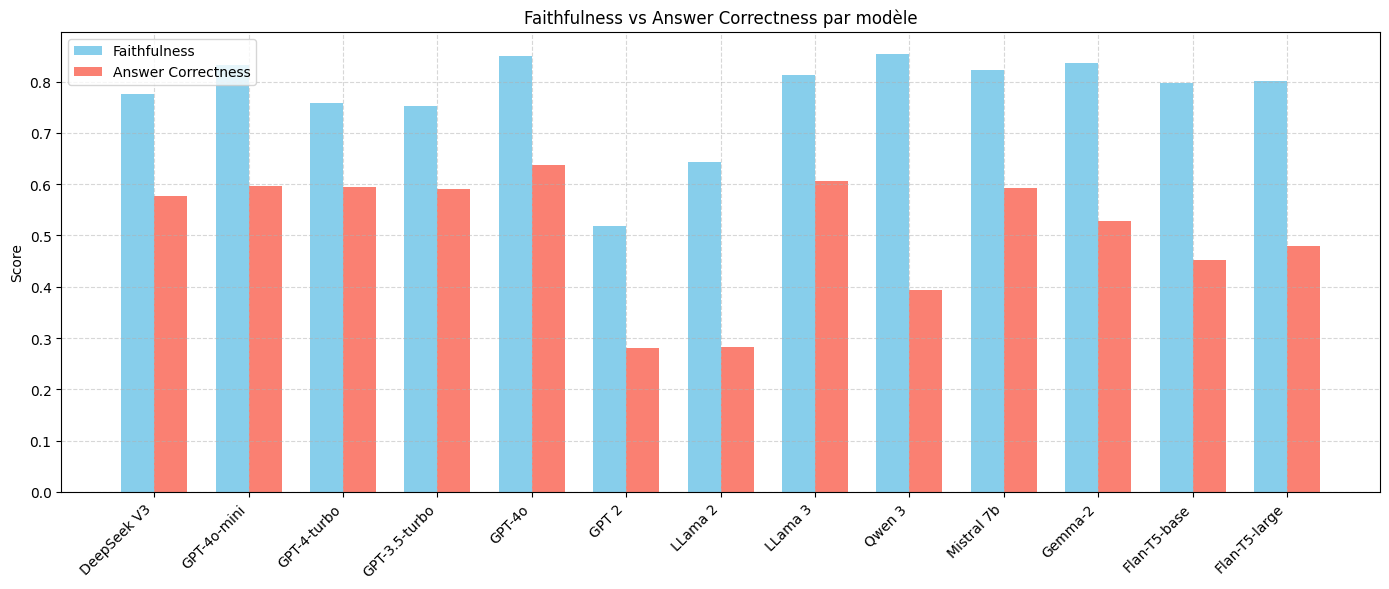

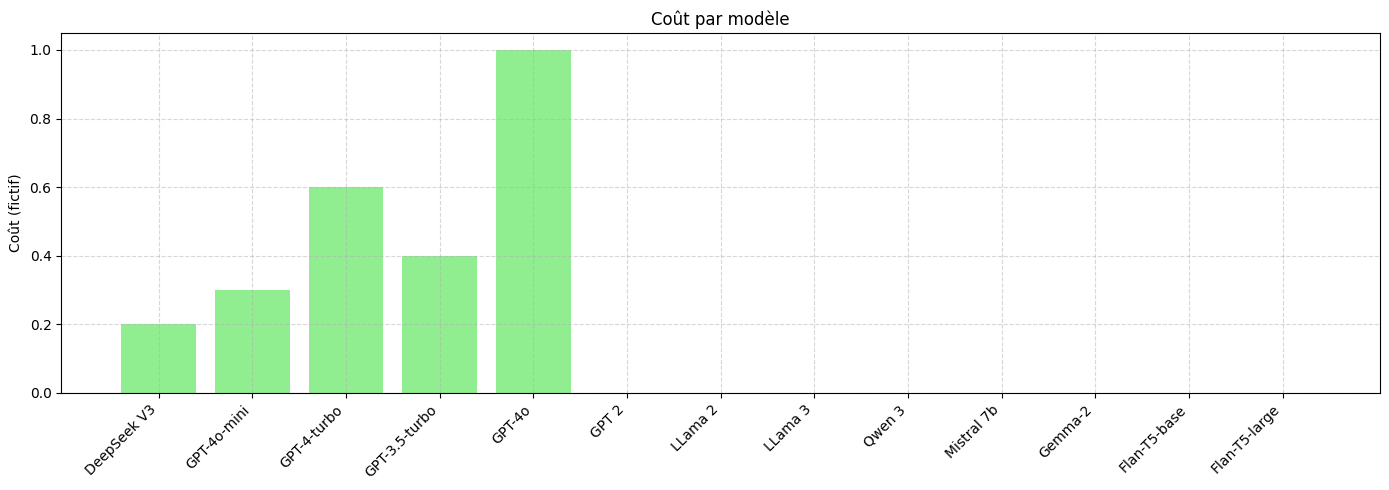

In [ ]:
# === Graphe 1 : Faithfulness & Answer Correctness ===
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, faithfulness, width, label='Faithfulness', color='skyblue')
plt.bar(x + width/2, answer_correctness, width, label='Answer Correctness', color='salmon')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Faithfulness vs Answer Correctness par modèle')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# === Graphe 2 : Coût par modèle ===
plt.figure(figsize=(14, 5))
plt.bar(models, costs, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coût (fictif)')
plt.title('Coût par modèle')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Partie 14 : Build the Gradio Interface

In [ ]:
!pip install gradio

In [ ]:
# import gradio as gr

# # Création de l'interface Gradio
# interface = gr.Interface(
#     fn=query,  # Appelle la fonction query(question, role)
#     inputs=[
#         gr.Textbox(label="Question"),  # Champ pour la question
#     ],
#     outputs="text",
#     title="RAG Chatbot Compta",
#     description="Pose une question pour obtenir une réponse personnalisée dans la Contabilite générée par LLaMa avec ChromaDB."
# )

In [ ]:
# Set up the Gradio interface
interface = gr.Interface(
    fn=ask_question,
    inputs="text",
    outputs=gr.Markdown(),  # Utilise le composant Markdown
    title="RAG Chatbot: Foundations of Comptabilite in Morroco",
    description="Ask any question about the Foundations of LLMs book. Powered by DeepSeek-R1."
)

In [ ]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5b5bd6c6eff25223a0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface.close()

Closing server running on port: 7860


# RAGAS - Définition et Formats Input/Output

## Qu’est-ce que RAGAS ?

**RAGAS** (Retrieval-Augmented Generation Analytics Suite) est une bibliothèque Python open-source dédiée à l’évaluation automatique des systèmes de génération de réponses basés sur la méthode **Retrieval-Augmented Generation (RAG)**.

Elle permet de mesurer la qualité des réponses générées par un modèle qui s’appuie sur des documents ou contextes externes, à travers plusieurs métriques clés telles que la fidélité (faithfulness), la justesse (answer correctness) et la pertinence du contexte (context relevance).

RAGAS est principalement utilisée pour évaluer et analyser des chatbots, assistants virtuels ou systèmes de question-réponse qui combinent recherche documentaire et génération de texte.

---

## Formats d’Entrée (Input)

Le dataset passé à RAGAS doit contenir au minimum les colonnes suivantes :

| Colonne         | Type              | Description                                           |
|-----------------|-------------------|-------------------------------------------------------|
| `question`      | `str`             | La question posée                                     |
| `contexts`      | `list[str]`       | Liste de passages/document(s) utilisés comme contexte |
| `ground_truth`  | `str`             | Réponse de référence (réponse correcte attendue)     |
| `pred_answer`   | `str` (optionnel) | Réponse générée par le modèle (si déjà disponible)    |

Le dataset peut être un `pandas.DataFrame` ou un `datasets.Dataset` (de la librairie HuggingFace).

---

## Fonction d’évaluation

```python
from ragas import evaluate
from ragas.metrics import faithfulness, answer_correctness, context_relevance

results = evaluate(
    dataset,
    metrics=[faithfulness, answer_correctness, context_relevance],
    reference_column="ground_truth",
    prediction_column="pred_answer"
)
```

Formats de Sortie (Output)
La fonction evaluate() renvoie un dictionnaire avec les scores globaux de chaque métrique, par exemple :
```python
{
    'faithfulness': 0.87,
    'answer_correctness': 0.79,
    'context_relevance': 0.85
}
```

Il est aussi possible d’accéder à un rapport détaillé au niveau de chaque question via :

```python
print(results.report)  # DataFrame avec les scores par question
```

Résumé
Étape	Description
Input	Dataset avec colonnes question, contexts, ground_truth, pred_answer
Appel de la fonction	evaluate() avec métriques et colonnes de référence/prédiction
Output	Dictionnaire de scores globaux + rapport détaillé par question



---

Veux-tu que je t’aide à créer un notebook ou script complet utilisant RAGAS ?